In [1]:
!nvidia-smi

Fri Jul 12 14:42:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:41:00.0 Off |                  Off |
|  0%   35C    P8              44W / 480W |    151MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

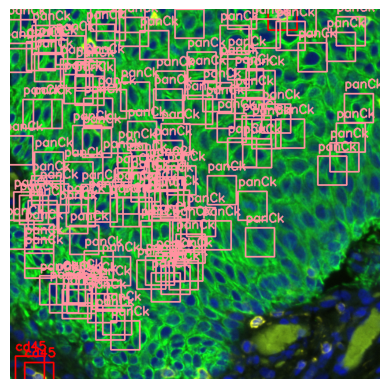

In [4]:
import cv2
import matplotlib.pyplot as plt

image_name = 18
i = 53
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/"
# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
image_path = f"{root}/ome-png/{image_name}_patches/images/patch_{i}.png"
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'

text_file_path = f"{root}/ome-png/{image_name}_patches/annotations/patch_{i}.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (160, 146, 255),  # #ff00ff
    '2': (0, 0, 255)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add text label based on the color
        if label == 0:
            label_text = "cd45"
        elif label == 1:
            label_text = "panCk"
        elif label == 2:
            label_text = "Others"
        else:
            label_text = "Unknown"

        # Define the position for the text label
        text_x = x1
        text_y = y1 - 10  # Place the label slightly above the bounding box

        # Draw the text label on the image
        cv2.putText(image, label_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Display the image with colored bounding boxes and labels
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


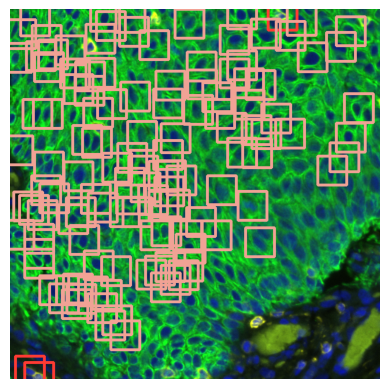

In [6]:
import cv2
import matplotlib.pyplot as plt

# image_name = 18
# roi_name = 60

# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
# image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/images/{file_name}.jpg"
# image_path = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/CC/images/CC_PATCH_1.png'
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'
# text_file_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/labels/{file_name}.txt"
# text_file_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/CC/annotations_yolov8/CC_PATCH_1.png-points_yolov8.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (51, 59, 255),  # #00ffff
    '1': (149, 162, 241),  # #ff00ff
    '2': (45, 115, 245)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 4)

        # Add text label based on the color
        if label == 0:
            label_text = "cd45"
        elif label == 1:
            label_text = "panCk"
        elif label == 2:
            label_text = "Others"
        else:
            label_text = "Unknown"

        # Define the position for the text label
        text_x = x1
        text_y = y1 - 10  # Place the label slightly above the bounding box

        # Draw the text label on the image
#         cv2.putText(image, label_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Display the image with colored bounding boxes and labels
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


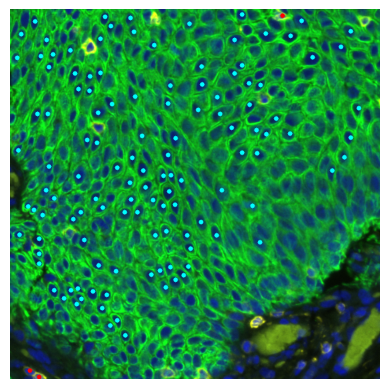

In [7]:
import cv2
import matplotlib.pyplot as plt

# image_name = 18
# roi_name = 60

# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
# image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/images/{file_name}.jpg"
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'
# text_file_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/labels/{file_name}.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (255, 255, 0),  # #ff00ff
    '2': (255, 0, 255)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()
# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the point on the image with the selected color
        # Set the radius of the circle (the third argument) to a small value to represent a point
        cv2.circle(image, (int(x_center), int(y_center)), radius=4, color=color, thickness=-1)

        # The rest of your code for adding text labels remains unchanged

# Display the image with colored points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.14 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24209MiB)
Setup complete ✅ (32 CPUs, 251.5 GB RAM, 331.9/1758.9 GB disk)


In [11]:
!yolo train model=yolov8x.pt data="/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/config.yaml" epochs=100 batch=1 imgsz=640

New https://pypi.org/project/ultralytics/8.2.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.54 🚀 Python-3.10.14 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24209MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/config.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class